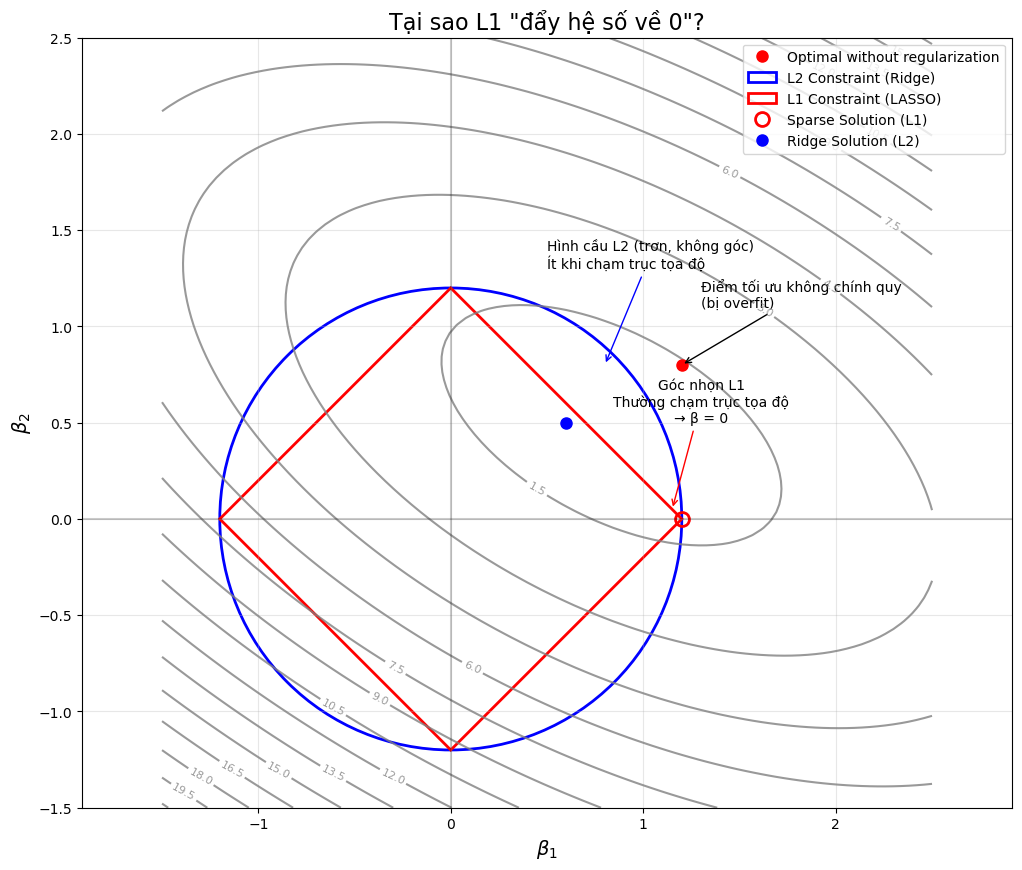

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Polygon

# Thiết lập không gian tọa độ
plt.figure(figsize=(12, 10))
ax = plt.gca()

# Tạo dữ liệu cho hàm mất mát (dạng elip)
x = np.linspace(-1.5, 2.5, 100)
y = np.linspace(-1.5, 2.5, 100)
X, Y = np.meshgrid(x, y)
Z = (X - 1.2)**2 + 2*(Y - 0.8)**2 + 1.5*X*Y  # Hàm mất mát giả định

# Vẽ đường đồng mức hàm mất mát
contour = plt.contour(X, Y, Z, levels=15, colors='gray', alpha=0.8)
plt.clabel(contour, inline=True, fontsize=8)

# Vẽ điểm tối ưu không chính quy
plt.plot(1.2, 0.8, 'ro', markersize=8, label='Optimal without regularization')

# Vẽ ràng buộc L2 (hình tròn)
l2_constraint = Circle((0, 0), radius=1.2, fill=False, color='blue', linestyle='-', linewidth=2, label='L2 Constraint (Ridge)')
ax.add_patch(l2_constraint)

# Vẽ ràng buộc L1 (hình thoi)
l1_points = [[1.2, 0], [0, 1.2], [-1.2, 0], [0, -1.2]]
l1_constraint = Polygon(l1_points, closed=True, fill=False, color='red', linestyle='-', linewidth=2, label='L1 Constraint (LASSO)')
ax.add_patch(l1_constraint)

# Đánh dấu các điểm đặc biệt trên trục
plt.plot(1.2, 0, 'ro', markersize=10, markerfacecolor='none', markeredgewidth=2, label='Sparse Solution (L1)')
plt.plot(0.6, 0.5, 'bo', markersize=8, label='Ridge Solution (L2)')

# Thiết lập đồ thị
plt.axhline(0, color='black', alpha=0.2)
plt.axvline(0, color='black', alpha=0.2)
plt.xlabel(r'$\beta_1$', fontsize=14)
plt.ylabel(r'$\beta_2$', fontsize=14)
plt.title('Tại sao L1 "đẩy hệ số về 0"?', fontsize=16)
plt.legend(loc='upper right')
plt.grid(alpha=0.3)
plt.axis('equal')

# Giải thích hình học
plt.annotate('Hình cầu L2 (trơn, không góc)\nÍt khi chạm trục tọa độ', 
             xy=(0.8, 0.8), xytext=(0.5, 1.3),
             arrowprops=dict(arrowstyle="->", color='blue'),
             fontsize=10)

plt.annotate('Góc nhọn L1\nThường chạm trục tọa độ\n→ β = 0', 
             xy=(1.15, 0.05), xytext=(1.3, 0.5),
             arrowprops=dict(arrowstyle="->", color='red'),
             fontsize=10, ha='center')

plt.annotate('Điểm tối ưu không chính quy\n(bị overfit)', 
             xy=(1.2, 0.8), xytext=(1.3, 1.1),
             arrowprops=dict(arrowstyle="->"),
             fontsize=10)

plt.show()